In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
image_as_array = mpimg.imread('../DATA/palm_trees.jpg')

In [3]:
image_as_array

array([[[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 23,  63,  99],
        [ 51,  91, 127],
        [ 50,  90, 126]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 31,  71, 107],
        [ 48,  88, 124],
        [ 47,  90, 125]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 39,  79, 115],
        [ 42,  85, 120],
        [ 44,  88, 123]],

       ...,

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [  9,   9,  11],
        [  9,   9,  11]],

       [[  3,   3,   5],
        [  3,   3,   5],
        [  3,   3,   5],
        ...,
        [  8,   8,  10],
        [  8,   8,  10],
        [  8,   8,  10]],

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [ 10,  10,  12],
        [ 10,  10,  12]]

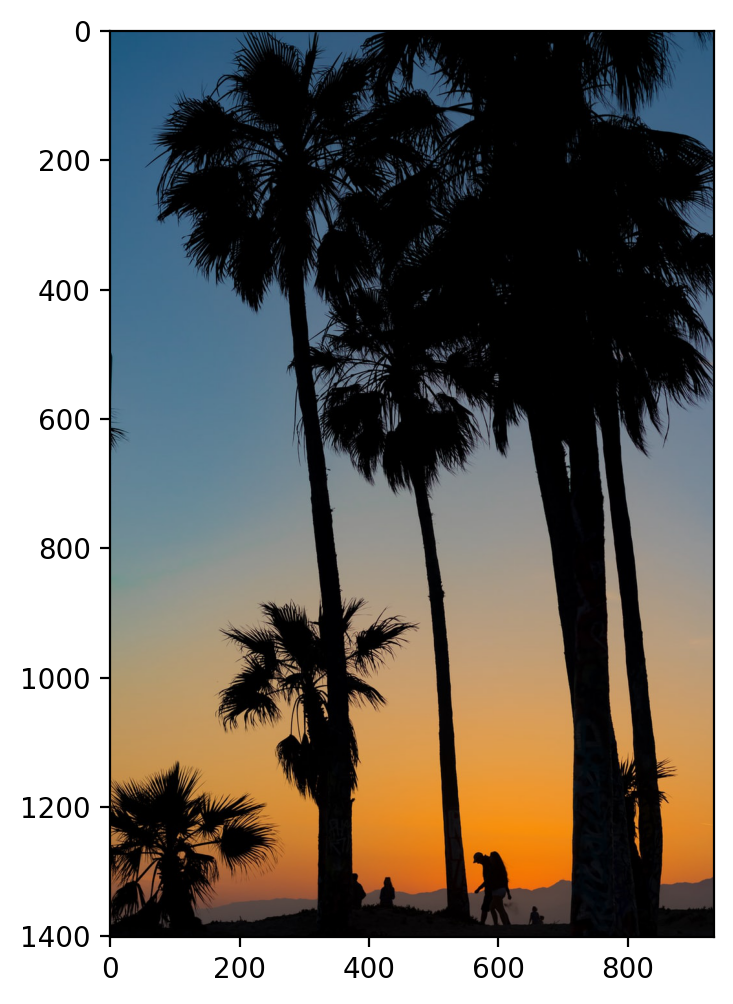

In [5]:
plt.figure(figsize=(8,6), dpi=200)
plt.imshow(image_as_array)

In [7]:
image_as_array.shape
# h, w, 3 color channel

(1401, 934, 3)

In [8]:
(h, w, c) = image_as_array.shape

In [9]:
image_as_array2d = image_as_array.reshape(h*w, c)

In [10]:
from sklearn.cluster import KMeans

In [11]:
model = KMeans(n_clusters=6)

In [12]:
labels = model.fit_predict(image_as_array2d)

In [13]:
labels

array([3, 3, 3, ..., 0, 0, 0])

In [14]:
model.cluster_centers_

array([[  2.75659154,   2.57529968,   3.70012508],
       [136.73533325, 143.74401484, 143.9844705 ],
       [219.02710886, 135.42650506,  47.00342746],
       [ 71.12526864, 109.27679682, 137.69417556],
       [ 67.25337203,  61.54496264,  62.01242432],
       [191.45660313, 154.52547084, 109.63137723]])

In [15]:
rgb_codes = model.cluster_centers_.round(0).astype(int)

In [16]:
rgb_codes

array([[  3,   3,   4],
       [137, 144, 144],
       [219, 135,  47],
       [ 71, 109, 138],
       [ 67,  62,  62],
       [191, 155, 110]])

In [17]:
quantized_image = np.reshape(rgb_codes[labels], (h, w, c))

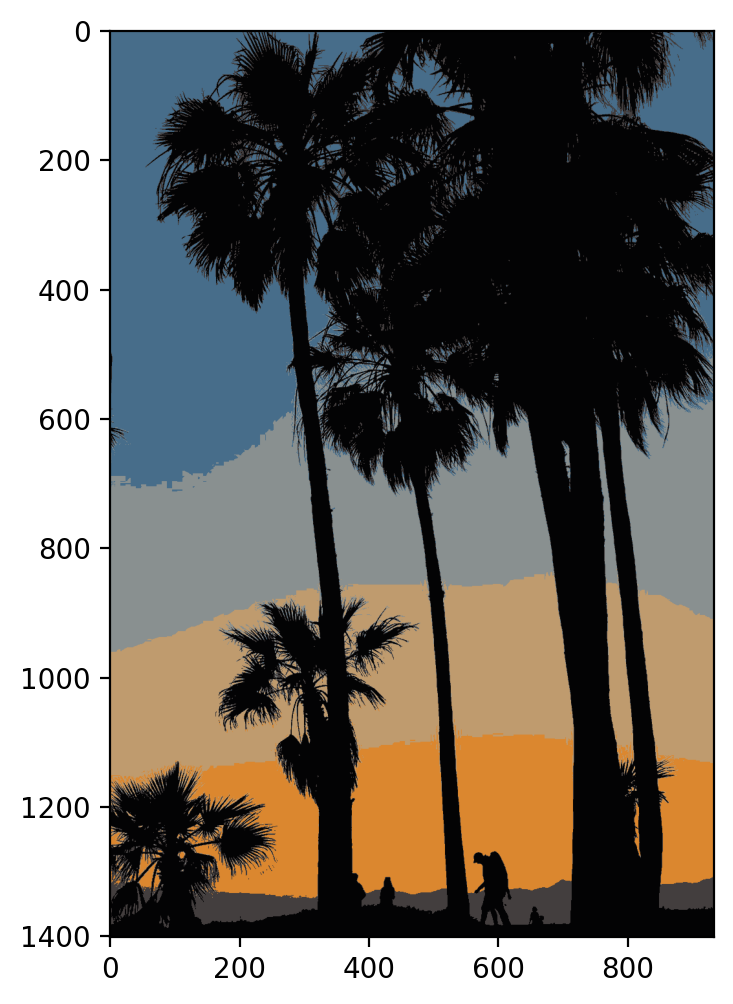

In [18]:
plt.figure(figsize=(8,6), dpi=200)
plt.imshow(quantized_image)

I went to destin this summer and I wanted to apply it to my summer photos

In [ ]:
image_as_array2 = mpimg.imread('../DATA/beach_destin.jpg')

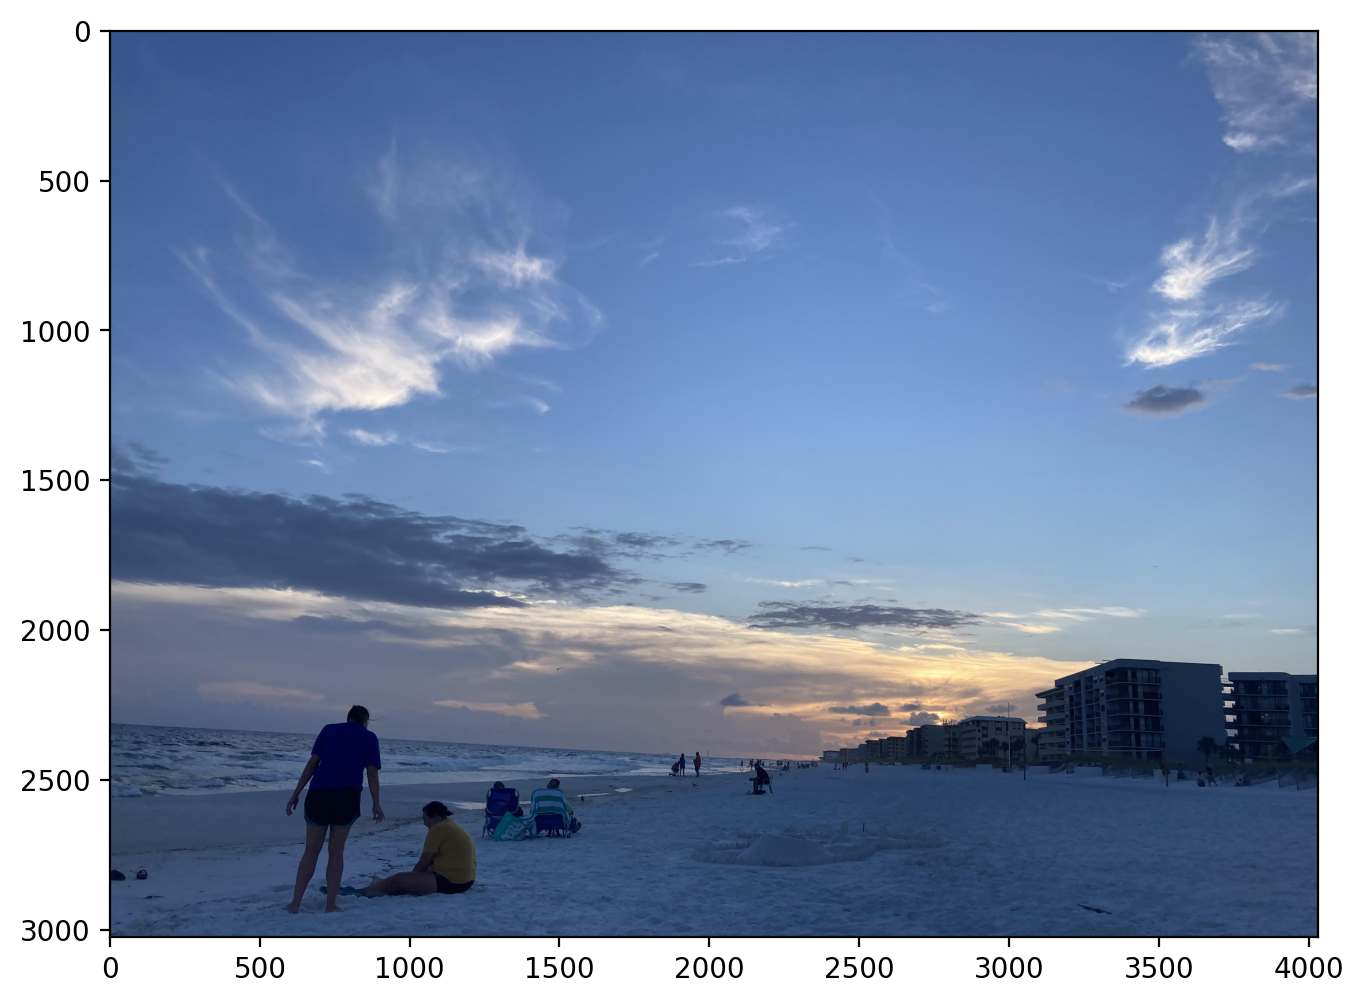

In [26]:
plt.figure(figsize=(8,6), dpi=200)
plt.imshow(image_as_array2)

In [21]:
(h, w, c) = image_as_array2.shape

In [23]:
image_as_array2_2d = image_as_array2.reshape(h*w, c)

In [24]:
image_as_array2_2d

array([[ 54,  84, 138],
       [ 54,  84, 138],
       [ 54,  84, 138],
       ...,
       [ 56,  76, 111],
       [ 56,  76, 111],
       [ 56,  76, 111]], dtype=uint8)

In [27]:
model = KMeans(n_clusters=15)

In [28]:
labels = model.fit_predict(image_as_array2_2d)

In [29]:
rgb_codes2 = model.cluster_centers_.round(0).astype(int)

In [31]:
quantized_image2 = np.reshape(rgb_codes2[labels], (h, w, c))

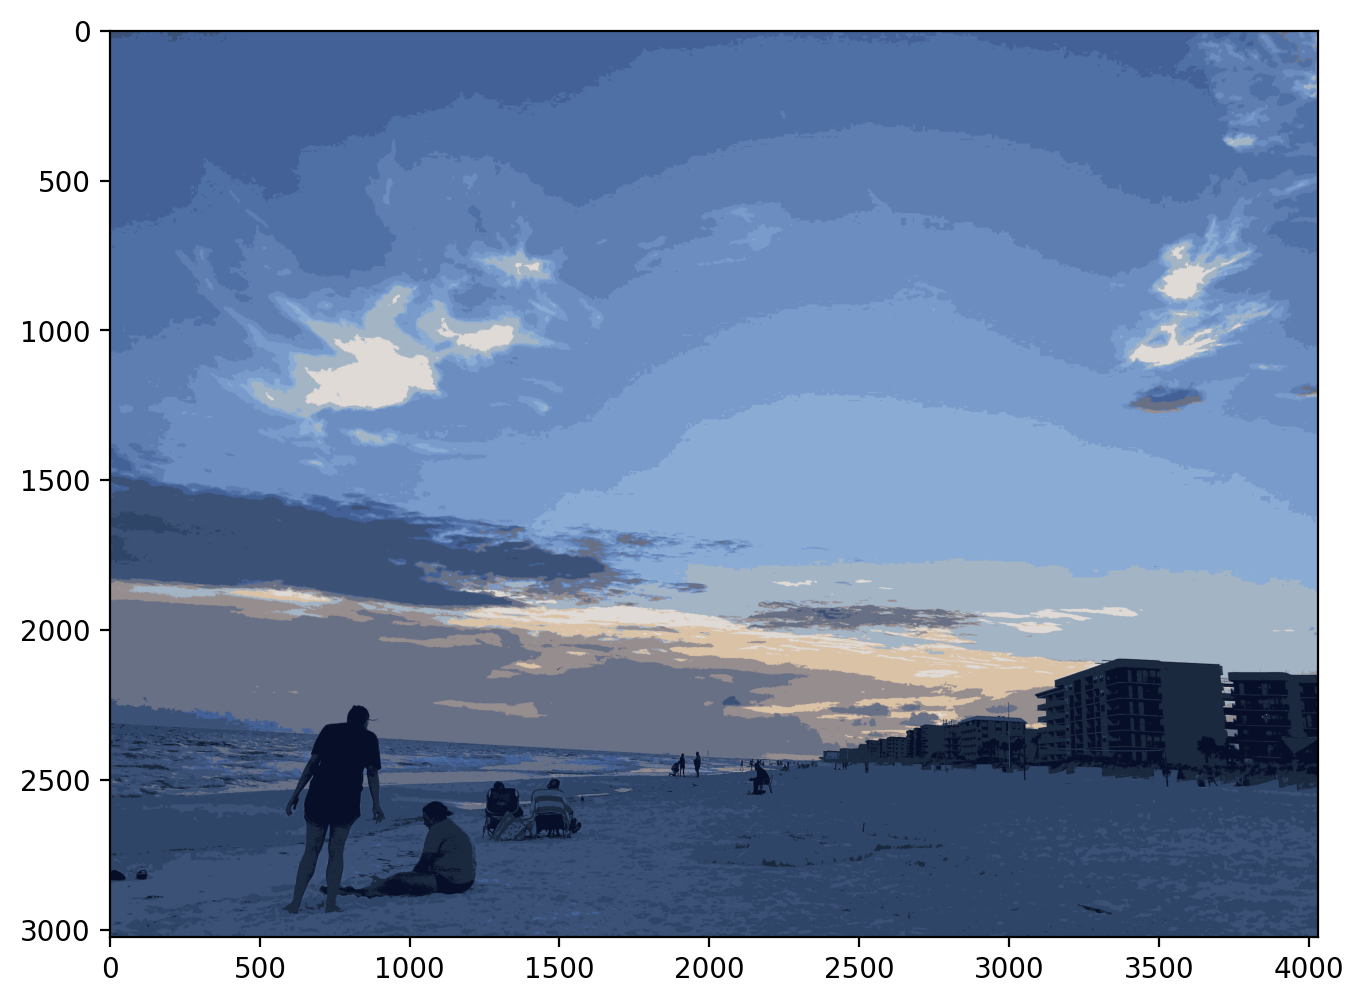

In [32]:
plt.figure(figsize=(8,6), dpi=200)
plt.imshow(quantized_image2)

In [33]:
def run_model(k, image):
    (h, w, c) = image.shape
    image = image.reshape(h*w, c)
    
    model = KMeans(n_clusters=k)
    labels = model.fit_predict(image)
    
    rgb_codes = model.cluster_centers_.round(0).astype(int)
    quantized_image = np.reshape(rgb_codes[labels], (h, w, c))
    
    plt.figure(figsize=(8,6), dpi=200)
    plt.imshow(quantized_image)

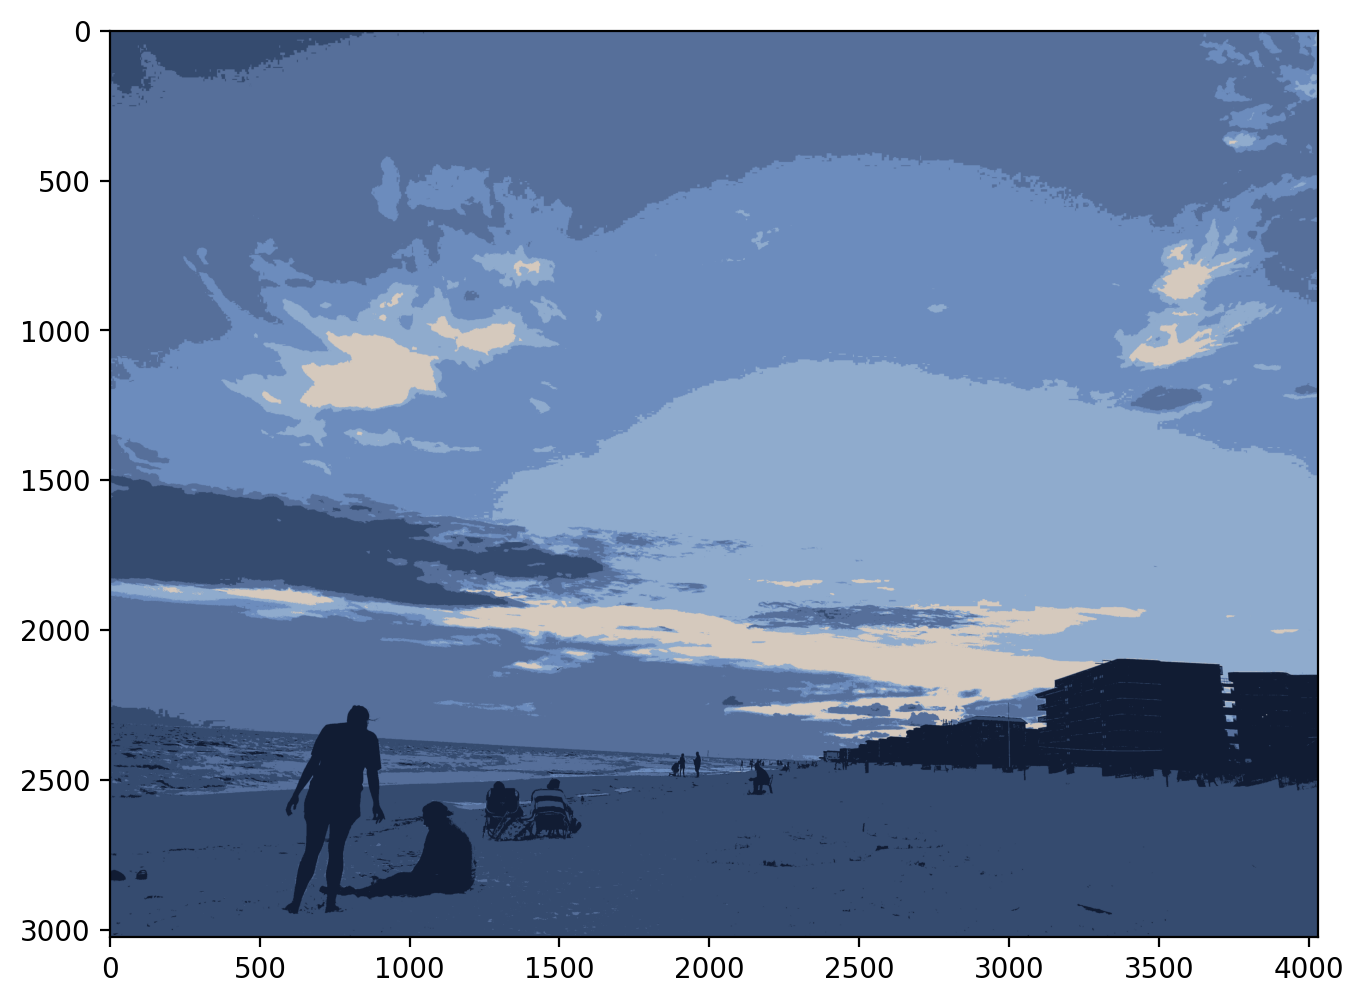

In [34]:
run_model(6, image_as_array2)

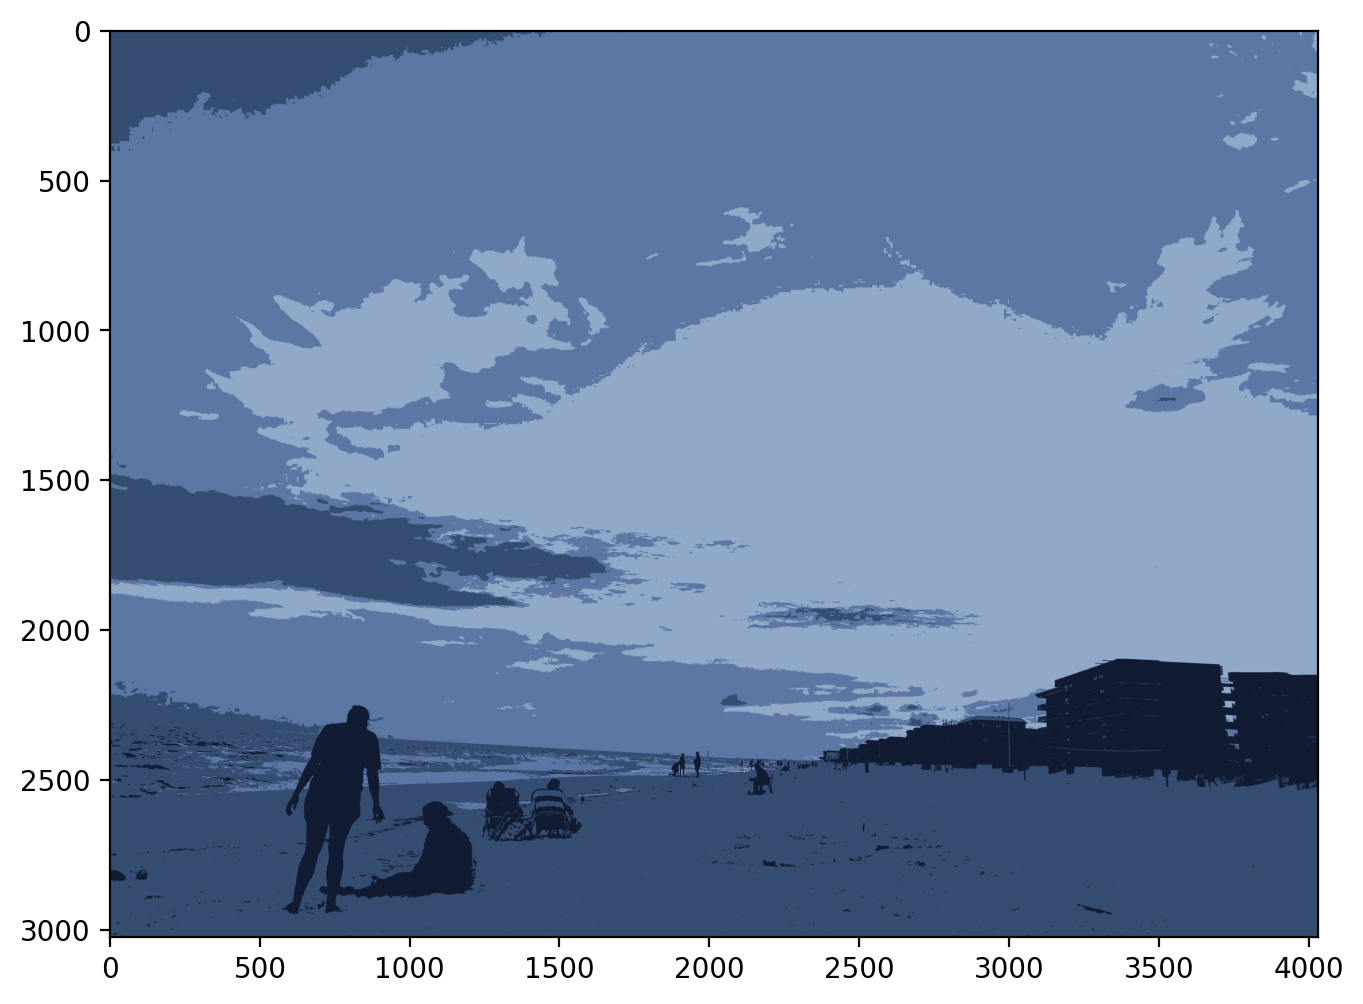

In [36]:
run_model(4, image_as_array2)

In [51]:
# for i in range(2,10):
#     run_model(i, image)